In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import seaborn as sns
import re
sns.set_style("white")
%matplotlib inline

In [2]:
patient_1 = glob.glob(os.path.abspath(os.path.join('E:', 'Seizure_Data', 'train_1', '*.mat')))

In [3]:
patient_1[0]

'E:\\Seizure_Data\\train_1\\1_1000_0.mat'

In [4]:
def mat_to_pandas(path):
    mat = loadmat(path)
    names = mat['dataStruct'].dtype.names
    ndata = {n: mat['dataStruct'][n][0, 0] for n in names}
    return pd.DataFrame(ndata['data'], columns=ndata['channelIndices'][0])    

In [55]:
df = mat_to_pandas(patient_1[0])
df2 = mat_to_pandas(patient_1[11])

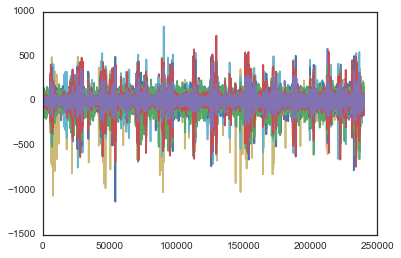

In [56]:
plt.plot(df)
plt.show()

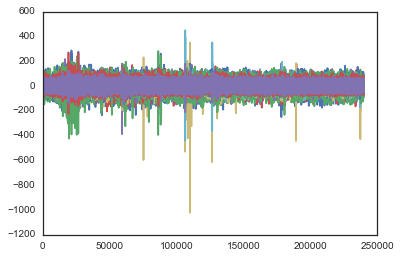

In [57]:
plt.plot(df2)
plt.show()

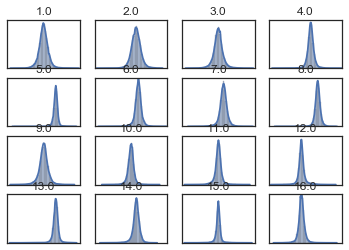

In [104]:
fig = plt.figure()

for col in df.columns:
    i = int(col)
    ax = fig.add_subplot(4,4,i)
    sns.distplot(df[col])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(col)

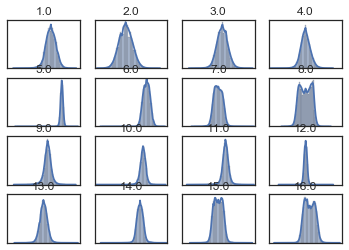

In [103]:
fig = plt.figure()

for col in df2.columns:
    i = int(col)
    ax = fig.add_subplot(4,4,i)
    sns.distplot(df2[col])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(col)

In [67]:
df.describe().loc[['mean','std', 'min', 'max']]
df2.describe().loc[['mean','std', 'min', 'max']]

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
mean,0.000156,0.082317,0.219471,-0.062844,0.077141,-0.115376,0.016216,-0.312451,-0.078153,-0.214814,-0.224584,0.262993,0.307152,0.285710,0.223638,-0.066829
std,34.300165,31.374385,33.381969,39.705007,29.327620,32.469536,35.212285,48.251101,23.357806,23.422390,22.468556,27.499286,31.740264,36.602621,36.524438,32.190854
min,-250.567230,-130.888260,-198.811386,-289.699188,-1020.972595,-436.292511,-213.163773,-188.000000,-204.709824,-388.105286,-262.437073,-440.564972,-234.125793,-424.051971,-225.245941,-212.055298
max,165.432770,157.111740,179.000000,217.300812,351.027435,169.707504,286.836243,196.236343,169.290176,180.894730,190.562927,449.435028,275.874207,281.948029,270.754059,178.944702


In [10]:
fnames = os.listdir(os.path.abspath(os.path.join('E:', 'Seizure_Data', 'train_1')))

In [12]:
def get_label(name):
    '''
    splits file name into patient, sample, label
    '''
    split = re.sub('.mat', '', name).split('_')
    return split

In [13]:
labels = map(get_label, fnames)

In [14]:
labels_df = pd.DataFrame(labels, columns=['patient', 'sample', 'label'])

In [20]:
labels_df = labels_df.apply(pd.to_numeric).sort_values('sample')

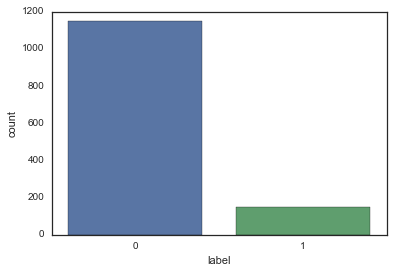

In [32]:
sns.countplot(labels_df['label'])

In [43]:
labels_df['label'].value_counts(normalize=True)

0    0.884793
1    0.115207
Name: label, dtype: float64